In [2]:
%matplotlib inline

Analyze Imaging Mass Cytometry data
===================================

This tutorial shows how to apply Squidpy to Imaging Mass Cytometry data.

The data used here comes from a recent paper from {cite}`jackson2020single`.
We provide a pre-processed subset of the data, in {class}`anndata.AnnData` format.
For details on how it was pre-processed, please refer to the original paper.


Import packages & data
----------------------
To run the notebook locally, create a conda environment as *conda env create -f environment.yml* using this
`environment.yml <https://github.com/scverse/squidpy_notebooks/blob/main/environment.yml>`_.

In [3]:
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.imc()

squidpy==1.2.2


100%|██████████| 1.50M/1.50M [00:00<00:00, 4.17MB/s]


First, let's visualize the cluster annotation in spatial context
with {func}`squidpy.pl.spatial_scatter`.

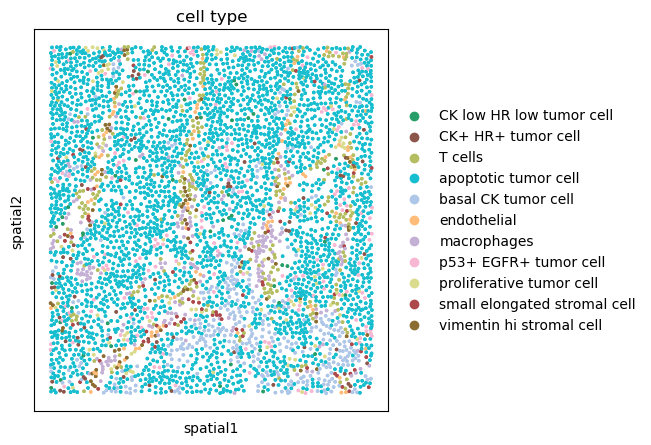

In [4]:
sq.pl.spatial_scatter(adata, shape=None, color="cell type", size=10)

We can appreciate how the majority of the tissue seems
to consist of *apoptotic tumor cells*. There also seem to be other
cell types scattered across the tissue, annotated as *T cells*,
*Macrophages* and different types of *Stromal cells*. We can also
appreciate how a subset of tumor cell, *basal CK tumor cells* seems
to be located in the lower part of the tissue.

Co-occurrence across spatial dimensions
+++++++++++++++++++++++++++++++++++++++

We can visualize cluster co-occurrence in spatial dimensions using the original
spatial coordinates.
The co-occurrence score is defined as:

.. math::

    \frac{p(exp|cond)}{p(exp)}

where {math}`p(exp|cond)` is the conditional probability of observing a
cluster {math}`exp` conditioned on the presence of a cluster {math}`cond`, whereas
{math}`p(exp)` is the probability of observing {math}`exp` in the radius size
of interest. The score is computed across increasing radii size
around each cell in the tissue.

We can compute this score with {func}`squidpy.gr.co_occurrence`
and set the cluster annotation for the conditional probability with
the argument ``clusters``. Then, we visualize the results with
{func}`squidpy.pl.co_occurrence`.
We visualize the result for two conditional groups, namely
*basal CK tumor cell* and *T cells*.

100%|██████████| 1/1 [00:09<00:00,  9.13s/]


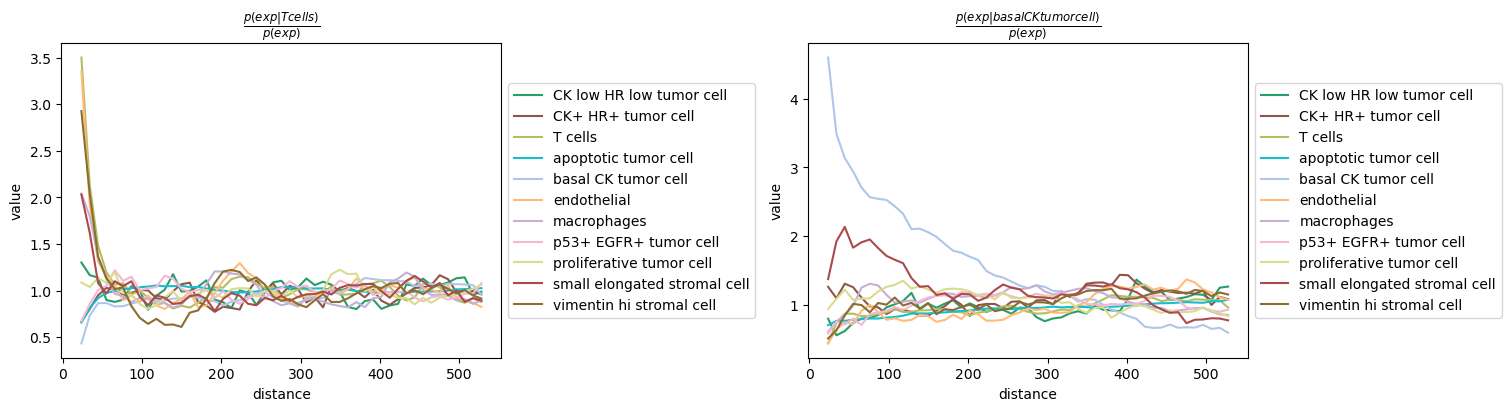

In [5]:
sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(
    adata,
    cluster_key="cell type",
    clusters=["basal CK tumor cell", "T cells"],
    figsize=(15, 4),
)

We can observe that *T cells* seems to co-occur
with *endothelial* and *vimentin hi stromal cells*,
whereas *basal CK tumor cell* seem to largely cluster
together, except for the presence of a type of stromal
cells (*small elongated stromal cell*) at close distance.

Neighborhood enrichment
+++++++++++++++++++++++
A similar analysis that can inform on the neighbor structure of
the tissue is the *neighborhood enrichment test*.
You can compute such score with the following function: {func}`squidpy.gr.nhood_enrichment`.
In short, it's an enrichment score on spatial proximity of clusters:
if spots belonging to two different clusters are often close to each other,
then they will have a high score and can be defined as being *enriched*.
On the other hand, if they are far apart, the score will be low
and they can be defined as *depleted*.
This score is based on a permutation-based test, and you can set
the number of permutations with the ``n_perms`` argument (default is 1000).

Since the function works on a connectivity matrix, we need to compute that as well.
This can be done with {func}`squidpy.gr.spatial_neighbors`.
Please see {doc}`../examples/graph/compute_spatial_neighbors` for more details
of how this function works.

Finally, we visualize the results with {func}`squidpy.pl.nhood_enrichment`.

100%|██████████| 1000/1000 [00:07<00:00, 137.46/s]


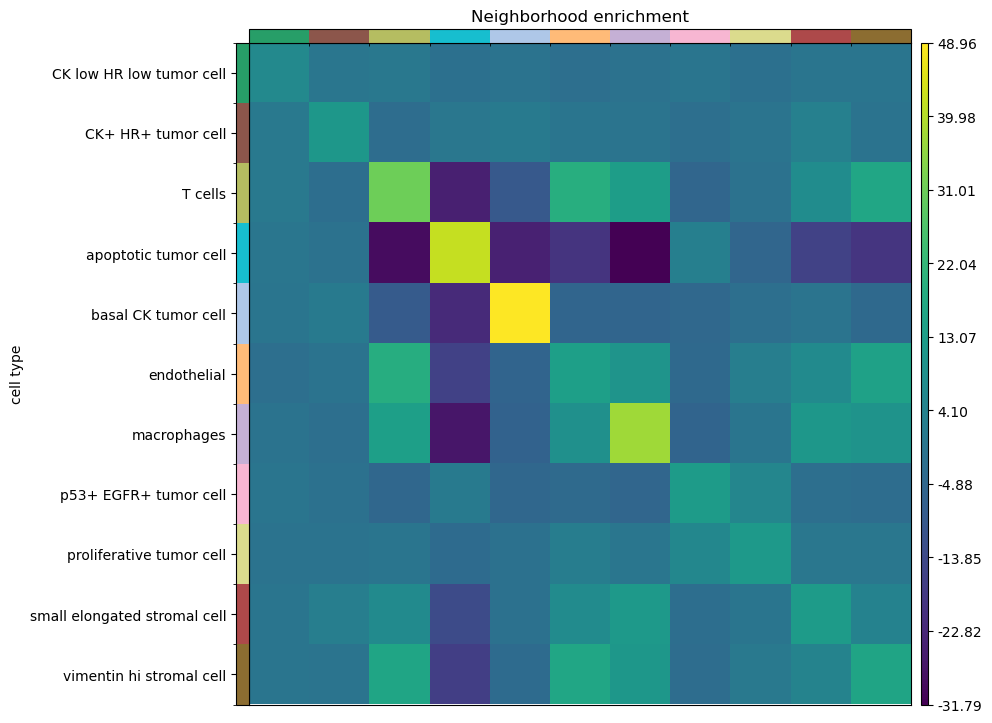

In [6]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell type")
sq.pl.nhood_enrichment(adata, cluster_key="cell type")

Interestingly, *T cells* shows an enrichment with *stromal* and
*endothelial cells*, as well as *macrophages*. Another interesting
result is that *apoptotic tumor cells*, being uniformly spread across
the tissue area, show a neighbor depletion against any other cluster
(but a strong enrichment for itself). This is a correct interpretation
from a permutation based approach, because the cluster annotation,
being uniformly spread across the tissue, and in high number, it's
more likely to be enriched with cell types from the same class,
rather than different one.

Interaction matrix and network centralities
+++++++++++++++++++++++++++++++++++++++++++
Squidpy provides other descriptive statistics of the spatial graph.
For instance, the interaction matrix, which counts the number of edges
that each cluster share with all the others.
This score can be computed with the function {func}`squidpy.gr.interaction_matrix`.
We can visualize the results with  {func}`squidpy.pl.interaction_matrix`.

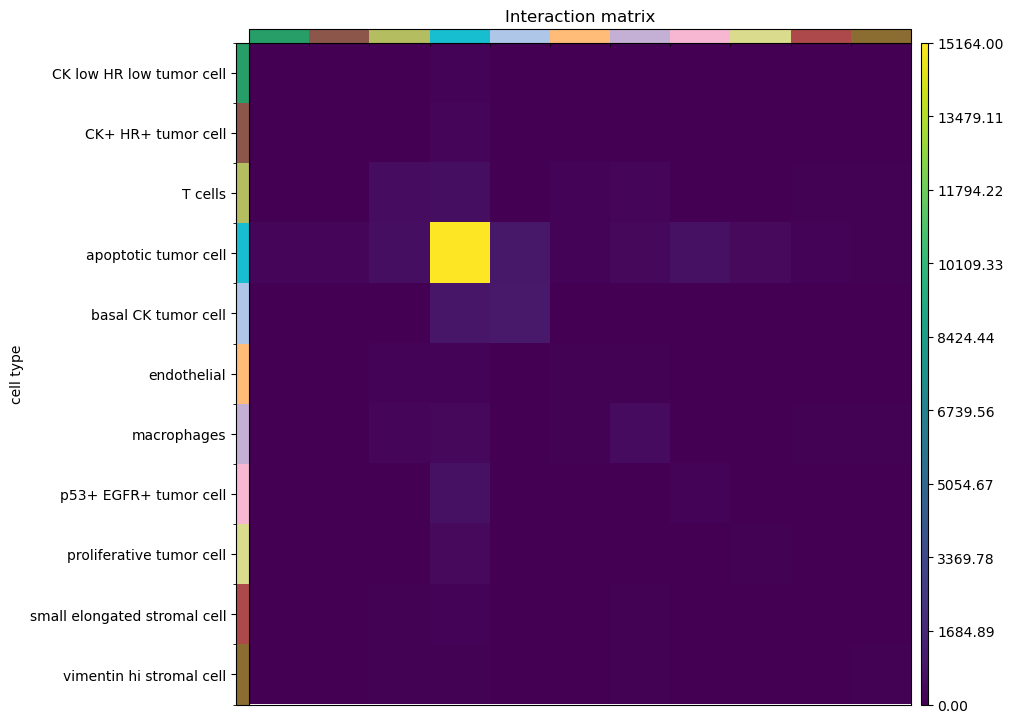

In [7]:
sq.gr.interaction_matrix(adata, cluster_key="cell type")
sq.pl.interaction_matrix(adata, cluster_key="cell type")

Finally, similar to the previous analysis,
we can investigate properties of the spatial graph by
computing different network centralities:

  - degree_centrality.
  - average_clustering.
  - closeness_centrality.

Squidpy provides a convenient function for all of them:
{func}`squidpy.gr.centrality_scores` and
{func}`squidpy.pl.centrality_scores` for visualization.

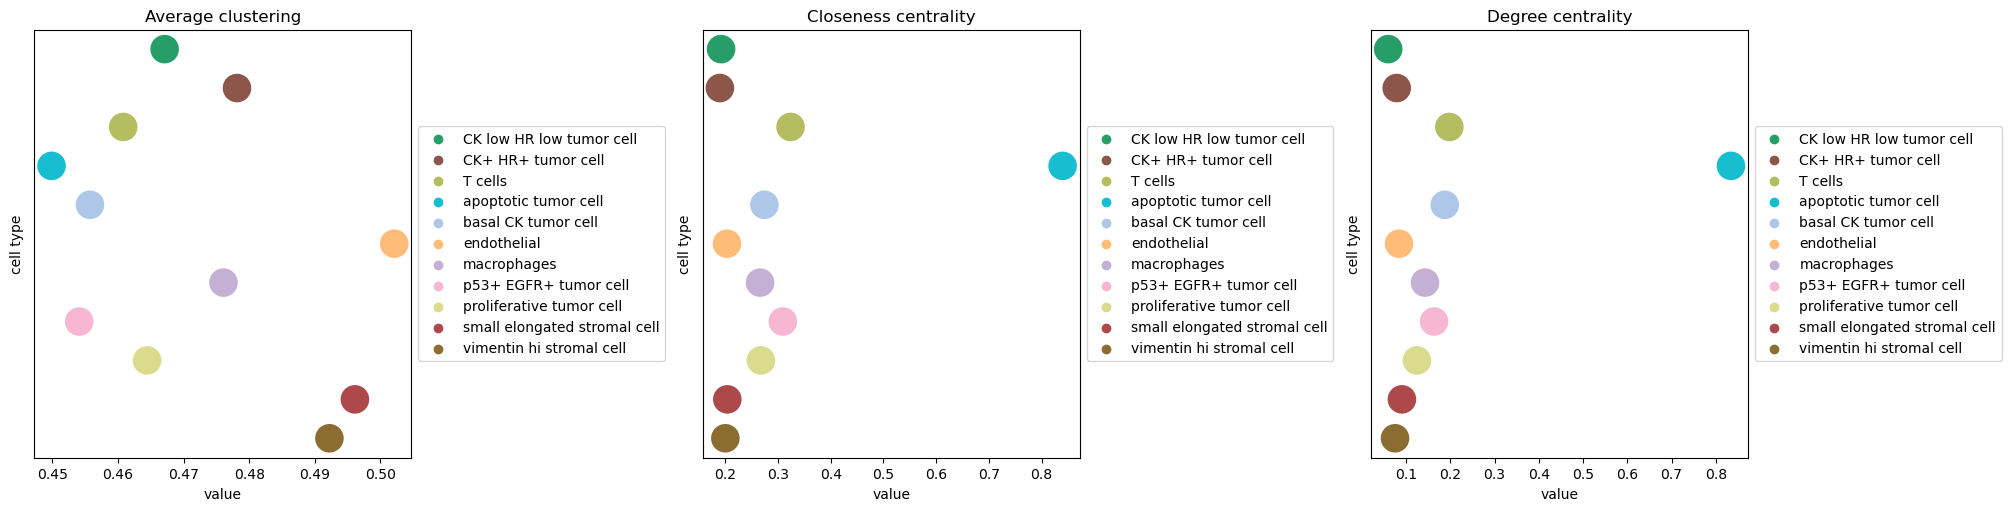

In [8]:
sq.gr.centrality_scores(
    adata,
    cluster_key="cell type",
)
sq.pl.centrality_scores(adata, cluster_key="cell type", figsize=(20, 5), s=500)

You can familiarize yourself with network centralities from the
excellent {mod}`networkx`
`documentation <https://networkx.org/documentation/stable/reference/algorithms/centrality>`_ .
For the purpose of this analysis, we can appreciate that the *apoptotic tumor cell*
clusters shows high closeness centrality, indicating that nodes belonging to that group
are often close to each other in the spatial graph.